In [2]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('500hits.csv', encoding='latin-1')
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [4]:
df = df.drop(columns=['PLAYER', 'CS'])
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [5]:
X = df.iloc[:,0:13]
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=8)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [9]:
y_pred = knn.predict(X_test)

In [10]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1])

In [11]:
knn.score(X_test, y_test)

0.9247311827956989

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm #67 HOF, 19 not HOF, 12 is actually not a HOF but model op 1, 7 is opposite 

array([[67,  0],
       [ 7, 19]])

In [14]:
cr = classification_report(y_test, y_pred)

In [15]:
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        67
           1       1.00      0.73      0.84        26

    accuracy                           0.92        93
   macro avg       0.95      0.87      0.90        93
weighted avg       0.93      0.92      0.92        93



In [16]:
print(knn.n_samples_fit_)

372


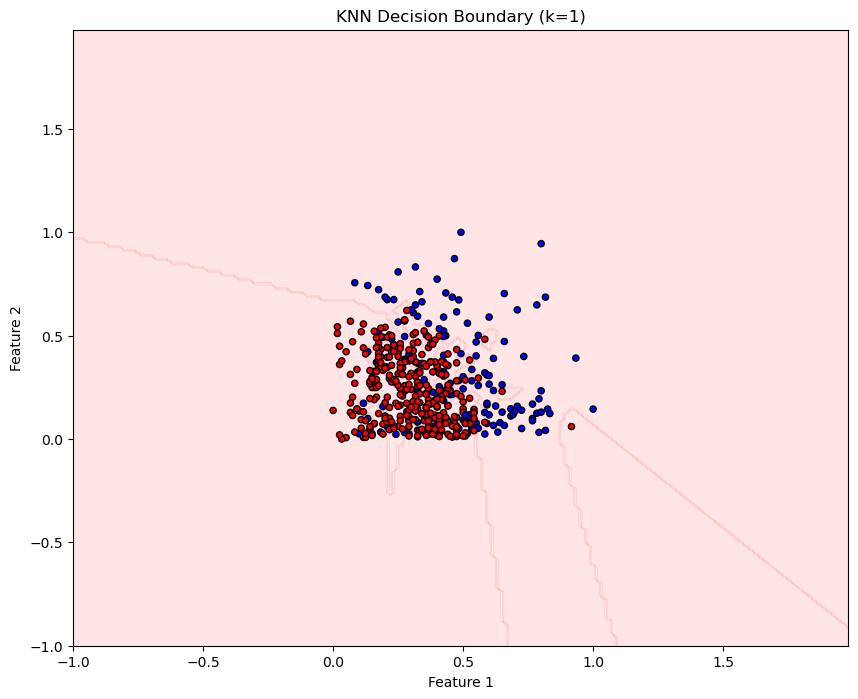

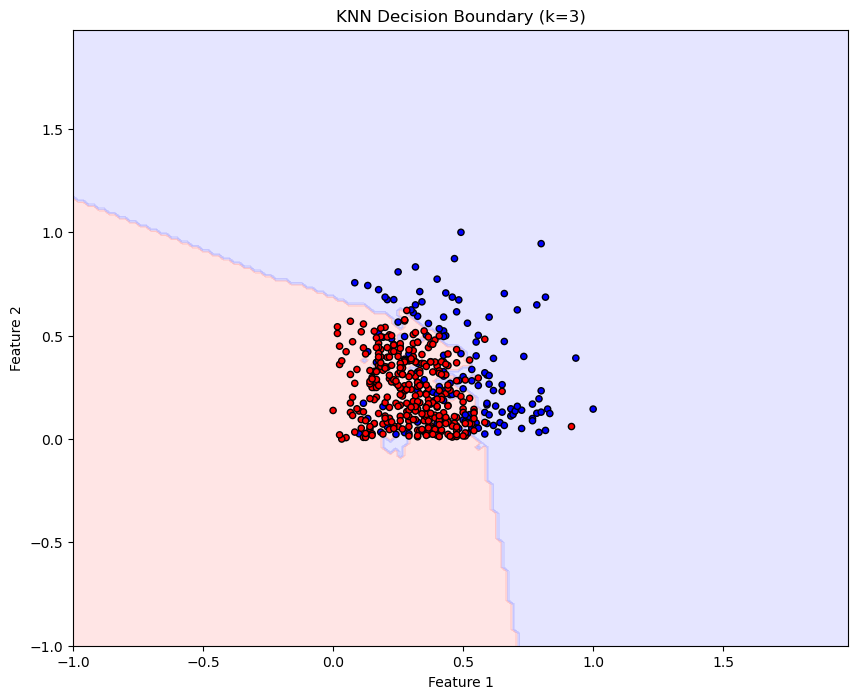

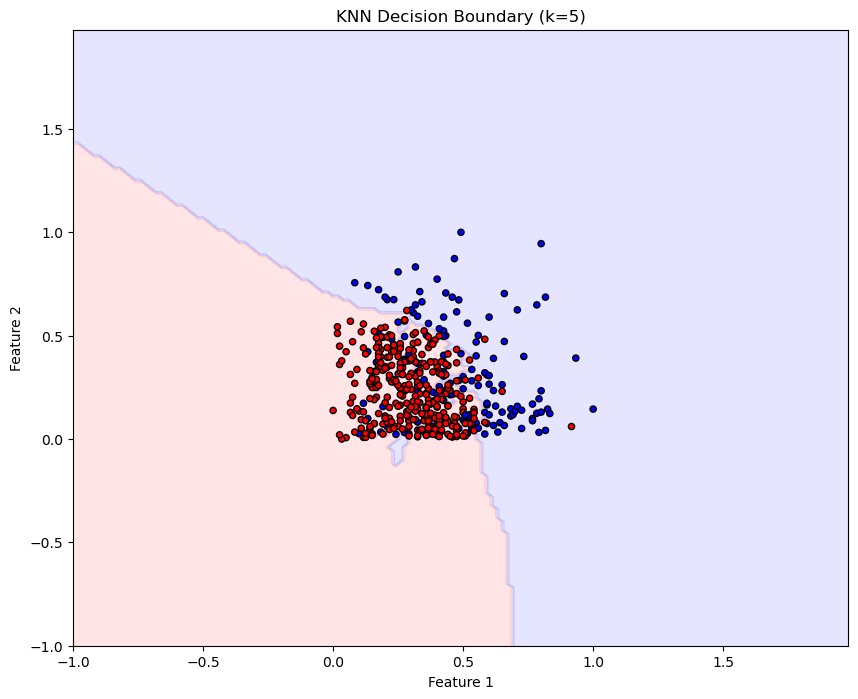

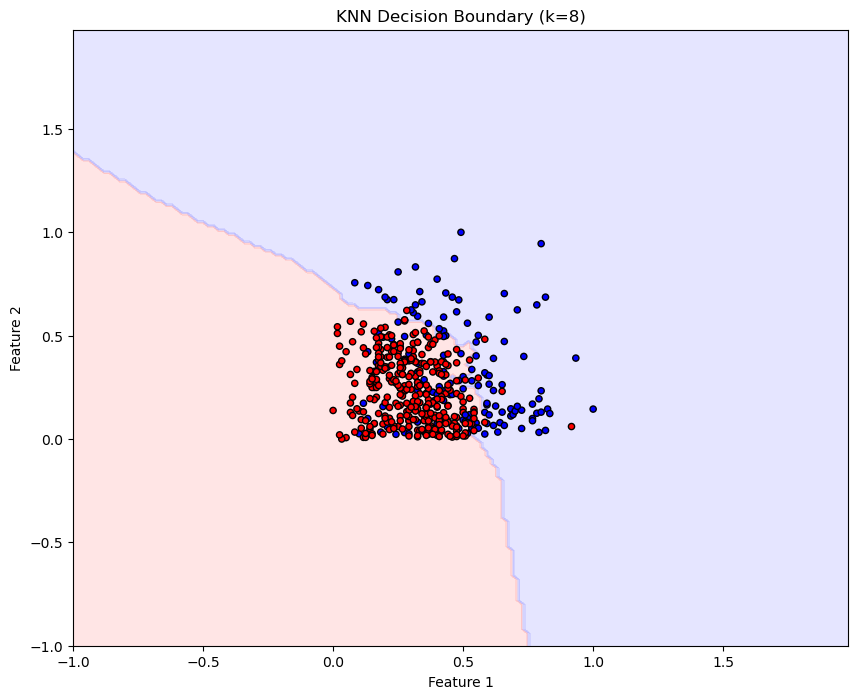

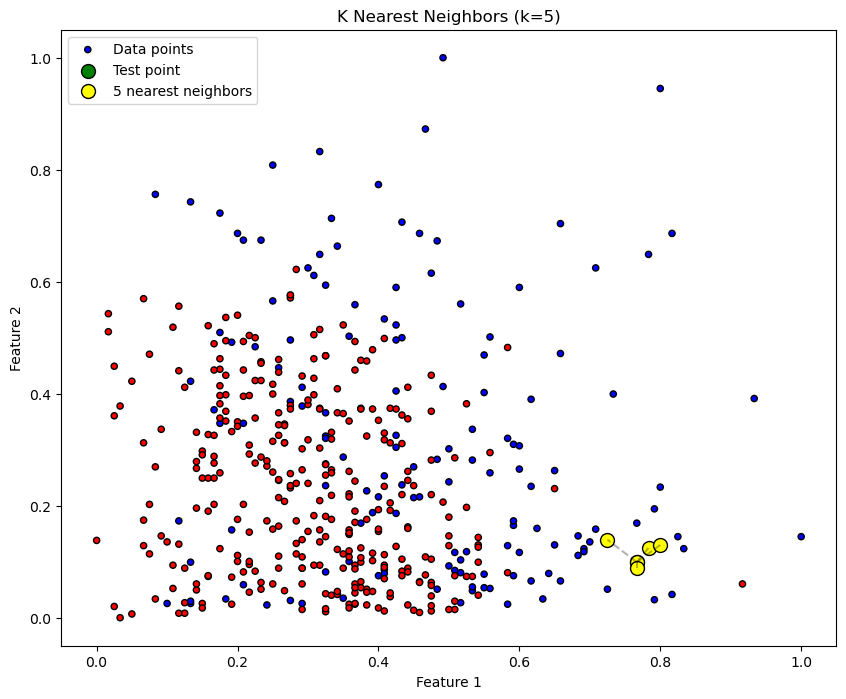

C:\Users\tuana\AppData\Local\Temp\ipykernel_2632\2797409654.py:81: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='BA', y='HR', hue='HOF', palette=['red', 'blue'])


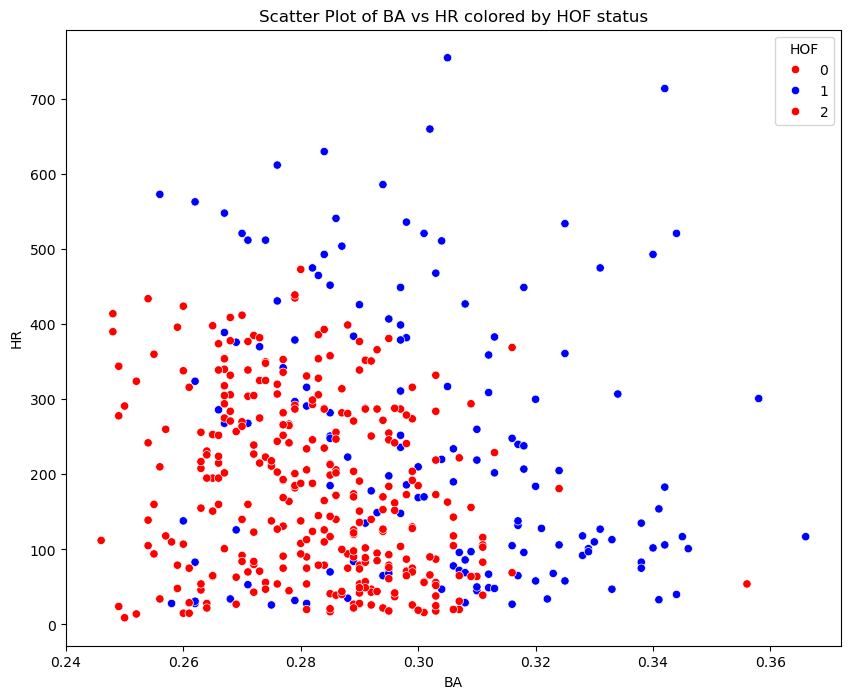

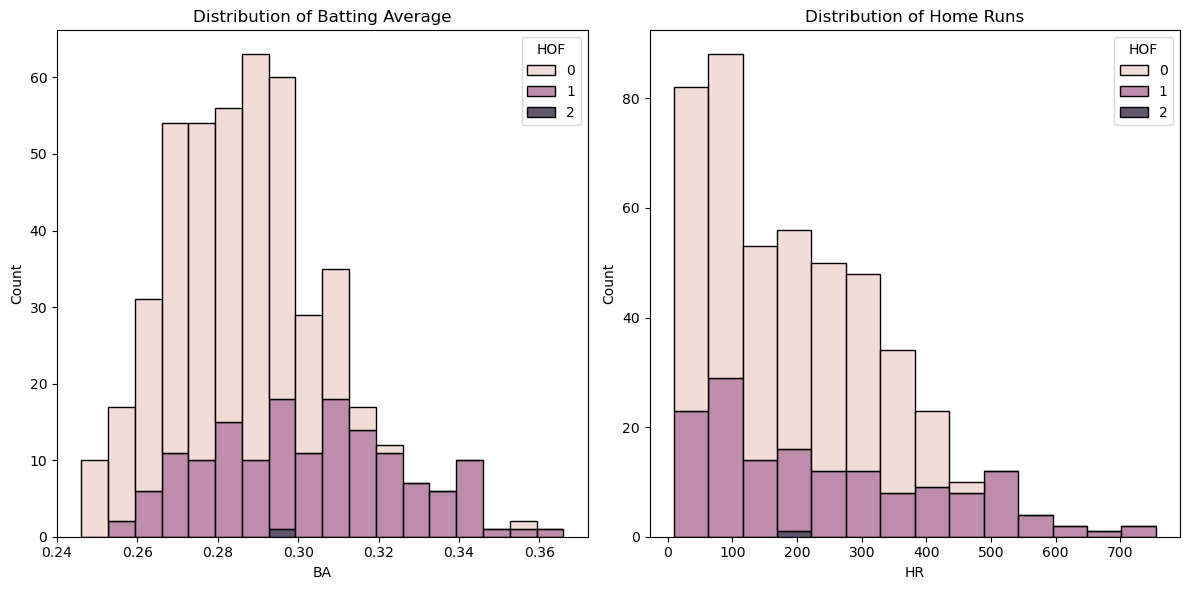

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np
# Tạo hàm để visualize KNN
def plot_knn_boundary(X, y, k, title):
    # Tạo lưới điểm để vẽ decision boundary
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Fit KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Dự đoán cho mỗi điểm trong lưới
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tạo colormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Vẽ decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Chọn 2 features để visualize (ví dụ: 'BA' và 'HR')
X_vis = df[['BA', 'HR']].values
y_vis = df['HOF'].values

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Vẽ decision boundary cho các giá trị k khác nhau
for k in [1, 3, 5, 8]:
    plot_knn_boundary(X_vis_scaled, y_vis, k, f'KNN Decision Boundary (k={k})')

# Vẽ biểu đồ biểu diễn k láng giềng gần nhất cho một điểm dữ liệu
def plot_k_neighbors(X, y, k, point_idx):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Lấy k láng giềng gần nhất
    distances, indices = knn.kneighbors([X[point_idx]])
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), 
                edgecolor='k', s=20, label='Data points')
    plt.scatter(X[point_idx, 0], X[point_idx, 1], c='green', s=100, 
                edgecolor='k', label='Test point')
    plt.scatter(X[indices[0], 0], X[indices[0], 1], c='yellow', s=100, 
                edgecolor='k', label=f'{k} nearest neighbors')
    
    # Vẽ đường nối từ điểm test đến các láng giềng
    for i in indices[0]:
        plt.plot([X[point_idx, 0], X[i, 0]], [X[point_idx, 1], X[i, 1]], 'k--', alpha=0.3)
    
    plt.title(f'K Nearest Neighbors (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Chọn một điểm dữ liệu để minh họa
point_idx = 10  # Có thể thay đổi index để xem các điểm khác
plot_k_neighbors(X_vis_scaled, y_vis, 5, point_idx)

# Vẽ biểu đồ phân tán của dữ liệu
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BA', y='HR', hue='HOF', palette=['red', 'blue'])
plt.title('Scatter Plot of BA vs HR colored by HOF status')
plt.show()

# Vẽ biểu đồ phân phối của các features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BA', hue='HOF', multiple="stack")
plt.title('Distribution of Batting Average')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='HR', hue='HOF', multiple="stack")
plt.title('Distribution of Home Runs')
plt.tight_layout()
plt.show()